In [1]:
from find_prices_nonoverlap import *
from sklearn import metrics
from sklearn.model_selection import (GridSearchCV, StratifiedKFold, cross_val_score)
import warnings
warnings.filterwarnings(action='once')

In [2]:
df = pd.read_csv('single_family_home_values.csv')

print('Preparing Data: cleaning data')
not_useful_fields = ['id','city','state']#, 'address']
date_fields = ['lastSaleDate', 'priorSaleDate']
required_fields = ['address','latitude','longitude','zipcode','bedrooms',
                   'bathrooms','rooms','squareFootage',
                   'lotSize','yearBuilt',
                   'lastSaleDate','estimated_value']
zero_to_nan_fields = None
nan_to_zero_fields = ['priorSaleDate','priorSaleAmount']
# categorical_fields = ['zipcode']
remove_outliers=False
df2, new_fields = prepare_data(df, not_useful_fields=not_useful_fields,
        date_fields=date_fields,
        remove_outliers=remove_outliers,
        required_fields=required_fields,
        zero_to_nan_fields=zero_to_nan_fields,
        nan_to_zero_fields=nan_to_zero_fields,
        )
#         categorical_fields=categorical_fields,
print('Preparing Data: splitting test/train/validation')
df_train, df_test, df_validation = train_validate_test_split(df2)

X_test = df_test[df_test.columns.drop('estimated_value')]
y_test = df_test['estimated_value']

X_train = df_train[df_train.columns.drop('estimated_value')]
y_train = df_train['estimated_value'] 

Preparing Data: cleaning data
Nulling field priorSaleDate
Nulling field priorSaleAmount
Preparing Data: splitting test/train/validation


In [3]:
tzip = ImputeZipCodes()
tzip.fit_transform(X_train,y_train)

,address,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,...,priorSaleAmount,field,lastSaleDateDayOfWeek,lastSaleDateWeekOfYear,lastSaleDateMonth,lastSaleDateYear,priorSaleDateDayOfWeek,priorSaleDateWeekOfYear,priorSaleDateMonth,priorSaleDateYear
3,3040 Wadsworth Blvd,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,...,0.0,NaN,1,49,12,2008,4.0,26.0,6.0,2008.0
9451,2068 Kearney St,80207,39.748753,-104.917171,2,2.0,5,1046,6100,1931.0,...,410000.0,NaN,1,22,5,2016,2.0,16.0,4.0,2011.0
11212,2315 Ivanhoe St,80207,39.751457,-104.921445,4,2.0,9,1928,6250,1910.0,...,390000.0,NaN,1,39,9,2013,1.0,20.0,5.0,2003.0
12832,3390 Oneida St,80207,39.765245,-104.907823,3,2.0,5,750,6250,1952.0,...,155000.0,NaN,1,11,3,2014,4.0,18.0,5.0,2013.0
1635,1385 Raleigh St,80204,39.738165,-105.041997,2,1.0,5,1129,6250,1903.0,...,65000.0,NaN,0,32,8,2016,2.0,29.0,7.0,2011.0
6786,460 Steele St,80206,39.723674,-104.949454,3,6.0,11,4870,6250,2004.0,...,2650000.0,NaN,0,37,9,2010,1.0,24.0,6.0,2007.0
9074,801 York St,80206,39.729352,-104.960520,4,6.0,12,5629,12500,1912.0,...,1350000.0,NaN,1,5,1,2015,1.0,37.0,9.0,2004.0
7073,385 Monroe St,80206,39.722180,-104.945300,3,3.0,8,3621,10410,1992.0,...,NaN,0.0,4,44,11,2007,NaN,NaN,NaN,NaN
1538,625 Newton St,80204,39.726646,-105.037598,0,1.0,2,350,5960,1924.0,...,65000.0,NaN,1,6,2,2017,3.0,31.0,8.0,2002.0
8694,1860 Race St,80206,39.745880,-104.963134,3,3.0,6,2515,4687,1887.0,...,460000.0,NaN,4,48,12,2016,1.0,35.0,8.0,2008.0


In [4]:
from sklearn.ensemble import (
    ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor 
)

print("Setting up pipeline")
features = ('latitude', 'longitude', 'zipcode',
            'bedrooms', 'bathrooms','rooms', 
            'squareFootage', 'lotSize', 
            'yearBuilt',
            'lastSaleAmount','lastSaleDateYear','lastSaleDateMonth','lastSaleDateDayOfWeek')


#: Note imputer will strip away column heads, it has to be after featurize
#reg_function = LGBMRegressor()
#reg_function = XGBRegressor()
reg_function = RandomForestRegressor(n_jobs=3)
#reg_function = GradientBoostingRegressor()
#reg_function = ExtraTreesRegressor(n_estimators=2)
#reg_function = AdaBoostRegressor(); #Really bad
pipeline = Pipeline([
            ('impute_zip_codes', ImputeZipCodes()),
          ('featurize', featurize(features)),
          ('imputer', Imputer(missing_values=np.nan, strategy="mean", axis=0)),
          ('forest', reg_function,)
            ])


Setting up pipeline


Fitting model on training data


/Users/derringi/.edm/envs/may2018/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/derringi/.edm/envs/may2018/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Evaluating model on training data
Sqrt mse: 62946.3957109
Mean absolute error: 27703.5489766
R2 score: 0.983299567761
Absolute mean relative error: 0.0384176211731


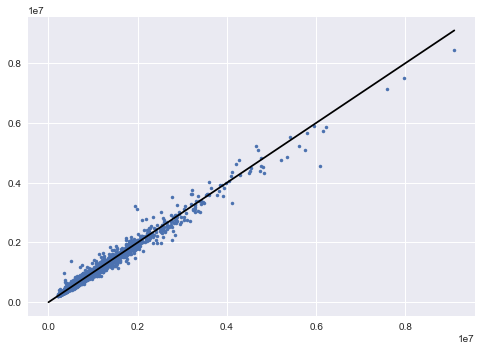

Evaluating model on testing data
Sqrt mse: 156636.196665
Mean absolute error: 67961.6894192
R2 score: 0.910941845039
Absolute mean relative error: 0.0942775542363


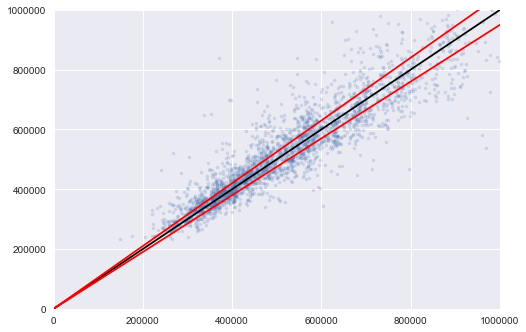

In [5]:

    
print("Fitting model on training data")
model = pipeline.fit(X = df_train, y = y_train)

print("Evaluating model on training data")
y_pred = model.predict(df_train)
print_metrics(y_train, y_pred)
plt.plot((y_train), (y_pred),'.')
y_max = (np.max((y_train, y_pred)))
plt.plot((0,y_max), (0,y_max),color='black')
plt.show()

print("Evaluating model on testing data")
y_test_pred = model.predict(X_test)
print_metrics(y_test, y_test_pred)
plt.plot((y_test), (y_test_pred),'.', alpha=0.2)
y_max = (np.max((y_test, y_test_pred)))
plt.plot((0,y_max), (0,y_max),color='black')
plt.plot((0,y_max), (0,y_max*1.05),color='red')
plt.plot((0,y_max), (0,y_max*0.95),color='red')
plt.xlim(0,1e6)
plt.ylim(0,1e6)
plt.show()

In [6]:
[c,b] = np.histogram(y_pred-y, bins=np.linspace(-1e6,1e6,100))
print(np.mean(y_pred-y))
plt.plot(b[:-1],c)
plt.show()

NameError: name 'y' is not defined

In [ ]:

sns.distplot(np.log(df['lastSaleAmount'].values+1))
 plt.show()


In [ ]:
#: Work on using grid-searches
params = {'forest__n_estimators':  (39,42)}
# params = {'forest__n_estimators':  np.arange(3,31,3)}
from sklearn.preprocessing import FunctionTransformer
# transformer = FunctionTransformer(np.log1p)
# transformer.transform(y)
grid = GridSearchCV(pipeline, params)
grid.fit(X = X, y = y)

#: Definining a specified cross-validation technique
cv= StratifiedKFold(n_splits=2)

# Alternatively, can say can say cv=3 to say a 3-repeat cross-validator
grid_search = GridSearchCV(pipeline, params)#, cv=cv)
#gsearch = GridSearchCV(pipeline, params)
grid_search.fit(X = X, y = y)
best_pipeline = grid_search.best_estimator_
best_pipeline.get_params()['forest']

In [ ]:
best_pipeline = grid_search.best_estimator_
best_pipeline.get_params()['forest']

In [ ]:
X = X_test
y=y_test
y_pred = best_pipeline.predict(X)
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))
print(metrics.mean_absolute_error(y,y_pred))
print(metrics.r2_score(y,y_pred))
print(abs_mean_relative_error(y,y_pred))
plt.plot(y, y_pred,'.')
y_max = np.max((y, y_pred))
plt.plot((0,y_max), (0,y_max),color='black')
plt.show()